## Support Vector Machine Analysis

In [5]:
import pandas as pd

df = pd.read_excel("finaldf_partner_imp_1k.xlsx", index_col=False)
df.drop(columns=["Column1","index_x","index_y","revenue_to_Revenue_ratio","symbol", "calendarYear", "marketCap"], axis = 1, inplace = True)
df.head()

,Label,Partner,totalCurrentAssets_to_totalAssets_ratio,totalNonCurrentAssets_to_totalAssets_ratio,totalCurrentLiabilities_to_totalLiabilities_ratio,totalNonCurrentLiabilities_to_totalLiabilities_ratio,costOfRevenue_to_Revenue_ratio,grossProfit_to_Revenue_ratio,operatingExpenses_to_Revenue_ratio,ebitda_to_Revenue_ratio,...,investmentsInPropertyPlantAndEquipment_to_Revenue_ratio,commonStockIssued_to_Revenue_ratio,debtRepayment_to_Revenue_ratio,debtToEquity,debtToAssets,daysOfInventoryOnHand,workingCapital_to_revenue_Ratio,employee_revenue_ratio,Number of Product Segments,Number of Geo Segments
0,2,263.0,52.543267,47.456733,65.918286,34.081714,72.963421,27.036579,19.487096,7.270342,...,-2030.050116,0.669815,-1346.597918,0.469952,0.149550,80.392441,16.931293,0.000226,3,3
1,2,263.0,50.142358,49.857642,62.165864,37.834136,74.850994,25.149006,19.476318,15.567115,...,-1607.798758,2.513364,-993.654078,0.680004,0.202260,92.362922,15.423757,0.000234,3,3
2,2,263.0,47.520648,52.479352,68.611247,31.388753,75.073354,24.926646,17.734589,13.704331,...,-294.934587,166.070145,164.719169,0.720136,0.225146,96.741438,7.261509,0.000242,3,3
3,2,263.0,47.422916,52.577084,72.094450,27.905550,75.286739,24.713261,17.837664,12.844175,...,-354.411168,201.877065,200.226144,0.447787,0.177048,73.346435,7.006217,0.000251,4,3
4,2,263.0,47.904926,52.095074,75.492625,24.507375,73.459118,26.540882,18.771963,12.410075,...,-636.935020,362.817037,359.850068,0.206887,0.096555,77.153320,10.813318,0.000259,4,3


In [6]:
columns_to_scale = [ "totalCurrentAssets_to_totalAssets_ratio", "totalNonCurrentAssets_to_totalAssets_ratio", "totalCurrentLiabilities_to_totalLiabilities_ratio",
                    "totalNonCurrentLiabilities_to_totalLiabilities_ratio", "costOfRevenue_to_Revenue_ratio",
                    "grossProfit_to_Revenue_ratio", "operatingExpenses_to_Revenue_ratio", "ebitda_to_Revenue_ratio",
                    "commonStockIssued_to_Revenue_ratio","debtRepayment_to_Revenue_ratio", "debtToEquity", 
                    "debtToAssets", "workingCapital_to_revenue_Ratio", "employee_revenue_ratio"]

In [3]:
df.Label.value_counts()

2    250
1    250
3    250
4    250
Name: Label, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pylab as plt
import numpy as np

# Separate explanatory (X) and target (y) variables
X = df.copy()
y = X.pop("Label")

# Feature selection
selector = SelectKBest(f_classif, k=20)  # Adjust k as needed
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Create a DataFrame with the selected features
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new_df)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)


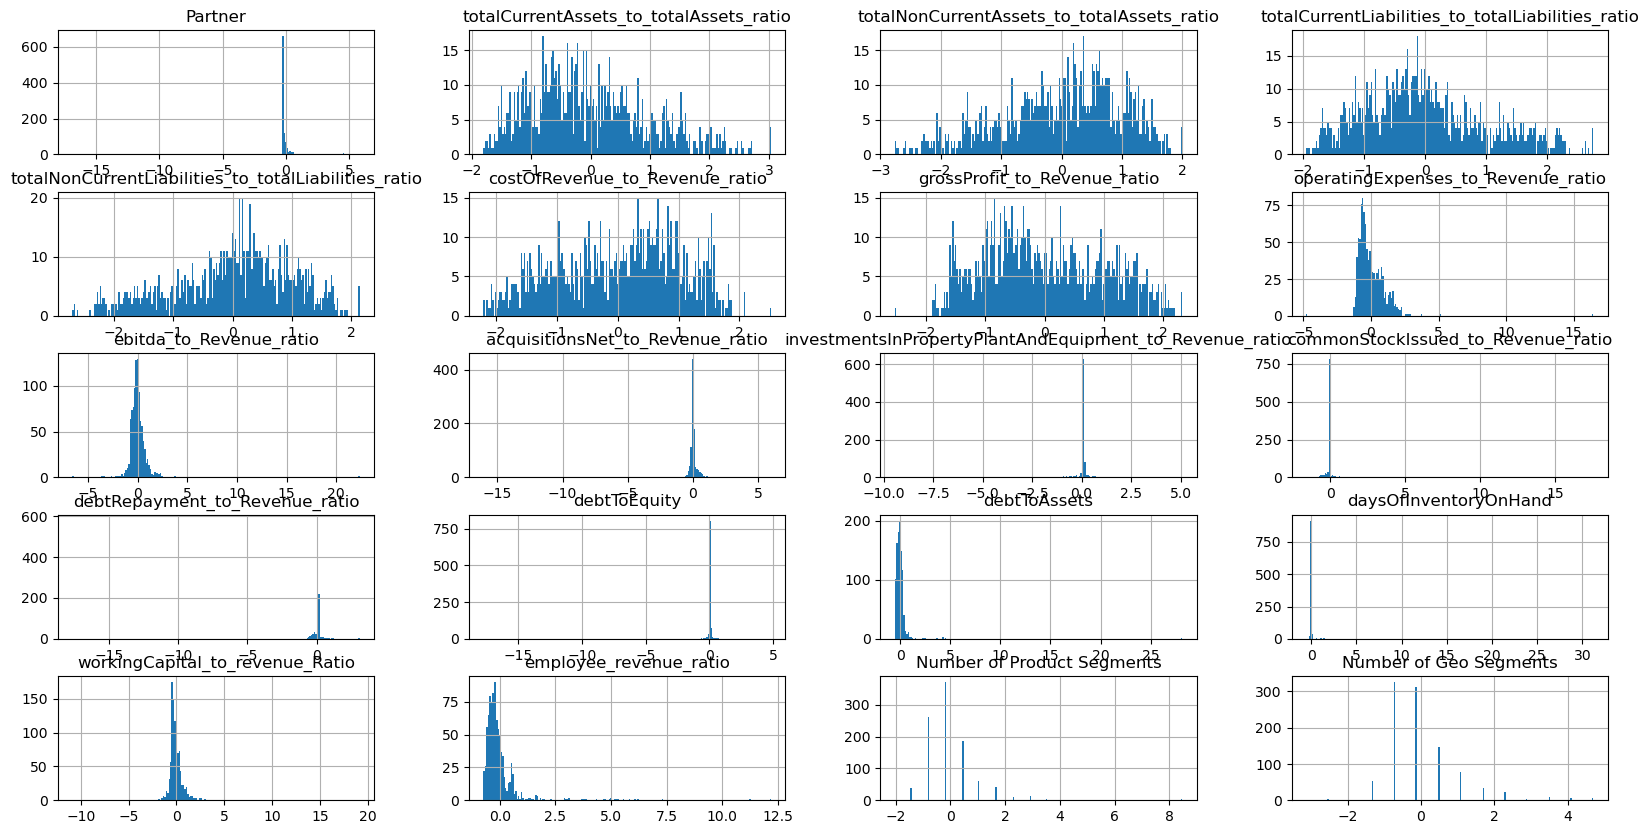

In [10]:
plt.rcParams["figure.figsize"] = (20, 10)
X_scaled_df.select_dtypes(exclude="bool").hist(bins=200)
plt.show()

Kernel: linear, Cross-validation scores: [0.66666667 0.7        0.725      0.675      0.6       ], Average cross-validation accuracy: 0.6733333333333333
Kernel: poly, Cross-validation scores: [0.59166667 0.59166667 0.65833333 0.625      0.59166667], Average cross-validation accuracy: 0.6116666666666667
Kernel: rbf, Cross-validation scores: [0.64166667 0.75833333 0.8        0.73333333 0.70833333], Average cross-validation accuracy: 0.7283333333333334
Kernel: sigmoid, Cross-validation scores: [0.45       0.55       0.55833333 0.54166667 0.525     ], Average cross-validation accuracy: 0.525


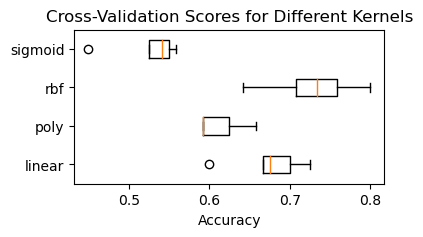

In [11]:
import numpy as np
import pandas as pd
import unittest
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

# Initial split into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_new_df, y, test_size=0.4, random_state=42, stratify=y)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cv_scores_dict = {}

# Perform cross-validation for each kernel
for kernel in kernels:
    svm_classifier = make_pipeline(StandardScaler(), SVC(kernel=kernel, decision_function_shape='ovr'))
    cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
    cv_scores_dict[kernel] = cv_scores
    print(f"Kernel: {kernel}, Cross-validation scores: {cv_scores}, Average cross-validation accuracy: {np.mean(cv_scores)}")

# Visualize the cross-validation results
plt.figure(figsize=(4, 2))
plt.boxplot([cv_scores_dict[kernel] for kernel in kernels], labels=kernels, vert=False)
plt.title('Cross-Validation Scores for Different Kernels')
plt.xlabel('Accuracy')
plt.show()

In [ ]:
best_kernel = max(cv_scores_dict, key=lambda k: np.mean(cv_scores_dict[k]))
svm_classifier_best = make_pipeline(StandardScaler(), SVC(kernel=best_kernel, decision_function_shape='ovr'))
svm_classifier_best.fit(X_train, y_train)


y_val_pred = svm_classifier_best.predict(X_val)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy with the best kernel:", val_accuracy)

# Predict on the test set
y_test_pred = svm_classifier_best.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy with the best kernel:", test_accuracy)
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_test_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4], yticklabels=[1,2,3,4])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(svm_classifier_best, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=np.array(X_test.columns)[perm_sorted_idx])
plt.title('Permutation Feature Importance')
plt.xlabel('Importance')
plt.show()

## Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svm_classifier_best, X_train, y_train, cv=10, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.figure(figsize=(10, 7))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

## Unit Test 


Shape of Cross-Validation Scores:

Test: test_cv_scores_shape
Purpose: This test checks that the cross-validation scores array has the correct shape. Specifically, it should contain 10 scores, one for each fold of the 10-fold cross-validation.
Reason: Ensuring the correct number of scores confirms that cross-validation was executed properly for each kernel.
Range of Average Cross-Validation Accuracy:

Test: test_average_accuracy_range
Purpose: This test checks that the average cross-validation accuracy for each kernel is within the valid range [0, 1].
Reason: Accuracy values should logically fall within this range, where 0 represents no correct classifications and 1 represents perfect classification. Values outside this range would indicate an error in the calculations or data handling.
Range of Test Accuracy:

Test: test_test_accuracy_range
Purpose: This test checks that the accuracy of the model on the test set is within the valid range [0, 1].
Reason: Like the average cross-validation accuracy, the test accuracy should also fall within the [0, 1] range. This test ensures the final model evaluation produces reasonable results.

In [ ]:
class TestSVMClassification(unittest.TestCase):
    def test_cv_scores_shape(self):
        for kernel, scores in cv_scores_dict.items():
            self.assertEqual(scores.shape, (10,), f"Cross-validation scores for kernel {kernel} should have 10 elements")

    def test_average_accuracy_range(self):
        for kernel, scores in cv_scores_dict.items():
            avg_accuracy = np.mean(scores)
            self.assertTrue(0 <= avg_accuracy <= 1, f"Average cross-validation accuracy for kernel {kernel} should be between 0 and 1")

    def test_test_accuracy_range(self):
        self.assertTrue(0 <= test_accuracy <= 1, "Test accuracy should be between 0 and 1")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)